In [1]:
# DIABETES DIOGONISTIC SYSTEM created from data collected from the laboratory at Medical City Hospital

In [2]:
#  -a specialist Center for Endocrinology and Diabetes, Al-Kindy ,Iraq

In [3]:
# IMPORT DEPENDENCES

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline

In [6]:
diabetes_data = pd.read_csv('./Dataset of Diabetes .csv')

In [7]:
diabetes_data.head()

,ID,No_Pation,Gender,AGE,Urea,Creatinine ratio,HbA1c,Cholesterol,Triglycerides,HDL Cholesterol,Low density lipoprotein,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1000 non-null   int64  
 1   No_Pation                1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   AGE                      1000 non-null   int64  
 4   Urea                     1000 non-null   float64
 5   Creatinine ratio         1000 non-null   int64  
 6   HbA1c                    1000 non-null   float64
 7   Cholesterol              1000 non-null   float64
 8   Triglycerides            1000 non-null   float64
 9   HDL Cholesterol          1000 non-null   float64
 10  Low density lipoprotein  1000 non-null   float64
 11  VLDL                     1000 non-null   float64
 12  BMI                      1000 non-null   float64
 13  CLASS                    1000 non-null   object 
dtypes: float64(8), int64(4), 

In [9]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,340.500000,2.403977e+02,1.0,125.75,300.5,550.25,800.00
No_Pation,1000.0,270551.408000,3.380758e+06,123.0,24063.75,34395.5,45384.25,75435657.00
AGE,1000.0,53.528000,8.799241e+00,20.0,51.00,55.0,59.00,79.00
Urea,1000.0,5.124743,2.935165e+00,0.5,3.70,4.6,5.70,38.90
Creatinine ratio,1000.0,68.943000,5.998475e+01,6.0,48.00,60.0,73.00,800.00
HbA1c,1000.0,8.281160,2.534003e+00,0.9,6.50,8.0,10.20,16.00
Cholesterol,1000.0,4.862820,1.301738e+00,0.0,4.00,4.8,5.60,10.30
Triglycerides,1000.0,2.349610,1.401176e+00,0.3,1.50,2.0,2.90,13.80
HDL Cholesterol,1000.0,1.204750,6.604136e-01,0.2,0.90,1.1,1.30,9.90
Low density lipoprotein,1000.0,2.609790,1.115102e+00,0.3,1.80,2.5,3.30,9.90


In [10]:
diabetes_data.shape

(1000, 14)

In [11]:
# The data set is made up of 1000 rows and 14 columns

In [12]:
diabetes_data.isnull().sum()

ID                         0
No_Pation                  0
Gender                     0
AGE                        0
Urea                       0
Creatinine ratio           0
HbA1c                      0
Cholesterol                0
Triglycerides              0
HDL Cholesterol            0
Low density lipoprotein    0
VLDL                       0
BMI                        0
CLASS                      0
dtype: int64

In [13]:
diabetes_data['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [14]:
diabetes_data.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Creatinine ratio', 'HbA1c',
       'Cholesterol', 'Triglycerides', 'HDL Cholesterol',
       'Low density lipoprotein', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [15]:
diabetes_data.drop('ID',axis=1,inplace=True)

In [16]:
diabetes_data['CLASS'] = diabetes_data['CLASS'].map({"N":0, "N ":0, "Y":1, "Y ":1, "P":2})

In [17]:
diabetes_data.head()

,No_Pation,Gender,AGE,Urea,Creatinine ratio,HbA1c,Cholesterol,Triglycerides,HDL Cholesterol,Low density lipoprotein,VLDL,BMI,CLASS
0,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [18]:
# Probe for NULL values
diabetes_data.isnull().sum()

No_Pation                  0
Gender                     0
AGE                        0
Urea                       0
Creatinine ratio           0
HbA1c                      0
Cholesterol                0
Triglycerides              0
HDL Cholesterol            0
Low density lipoprotein    0
VLDL                       0
BMI                        0
CLASS                      0
dtype: int64

In [19]:
# Apparently, there are no NULL values

In [20]:
diabetes_data['CLASS'].unique()

array([0, 2, 1], dtype=int64)

In [21]:
diabetes_data['CLASS'].value_counts()

1    844
0    103
2     53
Name: CLASS, dtype: int64

<AxesSubplot:xlabel='CLASS', ylabel='count'>

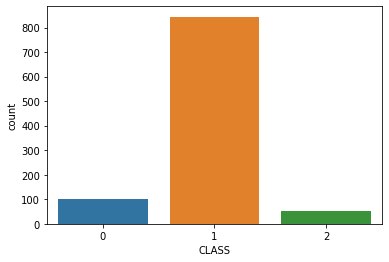

In [22]:
# Let's visualize the above result to visually compare the numbers
sns.countplot(x='CLASS',data=diabetes_data)

In [23]:
diabetes_data.columns

Index(['No_Pation', 'Gender', 'AGE', 'Urea', 'Creatinine ratio', 'HbA1c',
       'Cholesterol', 'Triglycerides', 'HDL Cholesterol',
       'Low density lipoprotein', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

C:\Users\MATTHEW\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


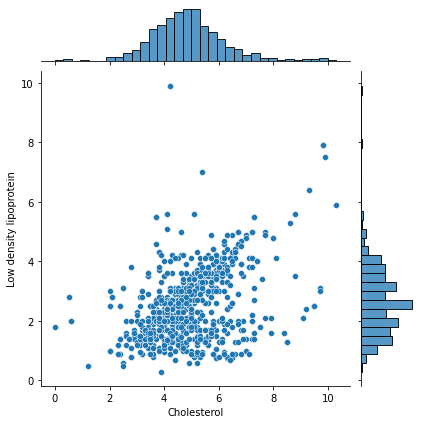

In [24]:
# Let's visualize how Cholesterol impacts Low density lipoprotein 
# sns.jointplot(df['Pregnancies'],df['Outcome'])
sns.jointplot(diabetes_data['Cholesterol'],diabetes_data['Low density lipoprotein'])

In [25]:
# Clearly, as low density lipoprotein increases with cholesterol

In [26]:
#The gender column is dropped since we only need numerical values for machine learning
diabetes_data.drop("Gender",axis=1,inplace=True)

In [28]:
diabetes_data.head()

,No_Pation,AGE,Urea,Creatinine ratio,HbA1c,Cholesterol,Triglycerides,HDL Cholesterol,Low density lipoprotein,VLDL,BMI,CLASS
0,17975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,34221,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,47975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,87656,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,34223,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [29]:
X = diabetes_data.iloc[:,0:-1]
y = diabetes_data.iloc[:,-1]

In [30]:
print(X)

     No_Pation  AGE  Urea  Creatinine ratio  HbA1c  Cholesterol  \
0        17975   50   4.7                46    4.9          4.2   
1        34221   26   4.5                62    4.9          3.7   
2        47975   50   4.7                46    4.9          4.2   
3        87656   50   4.7                46    4.9          4.2   
4        34223   33   7.1                46    4.9          4.9   
..         ...  ...   ...               ...    ...          ...   
995     454317   71  11.0                97    7.0          7.5   
996     876534   31   3.0                60   12.3          4.1   
997      87654   30   7.1                81    6.7          4.1   
998      24004   38   5.8                59    6.7          5.3   
999      24054   54   5.0                67    6.9          3.8   

     Triglycerides  HDL Cholesterol  Low density lipoprotein  VLDL   BMI  
0              0.9              2.4                      1.4   0.5  24.0  
1              1.4              1.1          

In [31]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: CLASS, Length: 1000, dtype: int64


In [32]:
# STANDARDIZE THE DATASET

In [33]:
scaler_instance = StandardScaler()

In [34]:
standardized_dataset = scaler_instance.fit_transform(X)

In [35]:
# X becomes reassigned with a now standardized dataset
X = standardized_dataset

In [36]:
print(X)

[[-0.07474738 -0.40114429 -0.14478078 ... -1.08545731 -0.369958
  -1.12462205]
 [-0.06993954 -3.13001704 -0.21295413 ... -0.4573978  -0.34264878
  -1.32623876]
 [-0.06586919 -0.40114429 -0.14478078 ... -1.08545731 -0.369958
  -1.12462205]
 ...
 [-0.0541266  -2.67520491  0.67329948 ... -0.18822944  1.70554268
  -0.43912523]
 [-0.07296316 -1.76558067  0.23017268 ...  0.2603845   3.31678663
   2.2020537 ]
 [-0.07294836  0.05366783 -0.04252074 ...  0.35010729 -0.31533956
   0.68992836]]


In [37]:
# Now, we split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
model_classifier = svm.SVC(kernel='linear')

In [39]:
# we train the model
model_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [40]:
# we make predictions and evaluation on the traning dataset
X_train_prediction = model_classifier.predict(X_train)
accuracy_score(X_train_prediction,y_train)

0.9432835820895522

In [41]:
# we also make predictions and evaluation on the traning dataset
X_test_prediction = model_classifier.predict(X_test)
accuracy_score(X_test_prediction,y_test)

0.9424242424242424

In [42]:
# BELOW IS A FUNCTION WHICH MAKES UP THE PREDITIVE SYSTEM

In [43]:
def model_prediction(input_data):
    # change the input data into a numpy array
    input_data_as_numpy_array = np.asarray(input_data)
    # we reshape the array since we are redicting for one instance
    reshaped_input_data =  input_data_as_numpy_array.reshape(1,-1)
    # Standardize the input
    scaler_instance.transform(reshaped_input_data)
    # make predictions
    prediction = model_classifier.predict(reshaped_input_data)
    if (prediction[0] == 0):
        return "This patient is not diabetic"
    elif (prediction[0] == 2):
        return "This patient is predicted diabetic"
    else:
        return "This patient is diabetic"

In [44]:
input_data = (34235,50,3.5,39,4,4,1.5,1.2,2.2,0.7,24,)

In [45]:
predictions = model_prediction(input_data)
predictions

C:\Users\MATTHEW\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'This patient is not diabetic'